<a href="https://colab.research.google.com/github/mohanrajmit/CVML/blob/master/image_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mohanrajmit/CVML.git

Cloning into 'CVML'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 68 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [2]:
from scipy.spatial import distance as dist
from imutils import paths
import numpy as np
import cv2

# grab the list of image paths and initialize the index to store the image filename
# and feature vector
imagePaths = sorted(list(paths.list_images("/content/CVML/1.color_channel/color_channel/dinos")))
print(imagePaths)
index = {}

# loop over the image paths
for imagePath in imagePaths:
	# load the image and extract the filename
	image = cv2.imread(imagePath)
	filename = imagePath[imagePath.rfind("/") + 1:]
	print(filename)
	#dinos/trex_01.png
	# extract the mean and standard deviation from each channel of the
	# BGR image, then update the index with the feature vector
	(means, stds) = cv2.meanStdDev(image)
	features = np.concatenate([means, stds]).flatten()
	index[filename] = features

# display the query image and grab the sorted keys of the index dictionary
query = cv2.imread(imagePaths[1])
#cv2.imshow("Query (trex_02.png)", query)
keys = sorted(index.keys())

# loop over the filenames in the dictionary
for (i, k) in enumerate(keys):
	# if this is the query image, ignore it
	if k == "trex_02.png":
		continue

	# load the current image and compute the Euclidean distance between the
	# query image (i.e. the 1st image) and the current image
	image = cv2.imread(imagePaths[i])
	d = dist.euclidean(index["trex_02.png"], index[k])

	# display the distance between the query image and the current image
	cv2.putText(image, "%.2f" % (d), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	cv2.imwrite(k, image)

# wait for a keypress
#cv2.waitKey(0)

['/content/CVML/1.color_channel/color_channel/dinos/trex_01.png', '/content/CVML/1.color_channel/color_channel/dinos/trex_02.png', '/content/CVML/1.color_channel/color_channel/dinos/trex_03.png', '/content/CVML/1.color_channel/color_channel/dinos/trex_04.png']
trex_01.png
trex_02.png
trex_03.png
trex_04.png


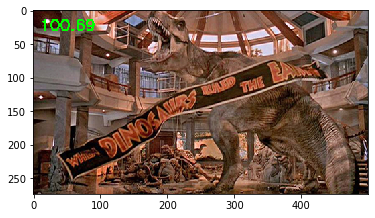

In [5]:
import matplotlib.pyplot as plt
import cv2
import imutils

img=cv2.imread("/content/trex_03.png")
plt.imshow(imutils.opencv2matplotlib(img))